## Numerical Hydrodynamics

Consider the 1D advection equation

\begin{equation}
\frac{\partial \rho}{\partial t} = -v\frac{\partial \rho}{\partial x}
\end{equation}

and let us discretize it in time and space 

\begin{equation}
\frac{\rho^{(n+1)}_i - \rho^{(n)}_i}{\Delta t } = - v \left( \frac{\rho^{(n)}_{i+1/2} - \rho^{(n)}_{i-1/2}}{\Delta x}\right)
\end{equation}

The quantity is not defined in the half-points. Different schemes differ in the way that these points are approximated numerically. 

We isolate the quantity we want to find, $\rho_i$ in the future

\begin{equation}
\rho^{(n+1)}_i  = \rho^{(n)}_i - \frac{v\Delta t}{\Delta x} \left( \rho^{(n)}_{i+1/2} - \rho^{(n)}_{i-1/2}\right)
\end{equation}

We define the <b>Courant number</b>, which is a dimensionless quantity that, as we see later, determines the <i>stability</i> of the different schemes

\begin{equation}
\boxed{
C \equiv \frac{v\Delta t}{\Delta x}
}
\end{equation}


In terms of the Courant number, the recurrence relation is 
\begin{equation}
\rho^{(n+1)}_i  = \rho^{(n)}_i - C \left( \rho^{(n)}_{i+1/2} - \rho^{(n)}_{i-1/2}\right)
\end{equation}


We make use of the concept of <b>flux</b>

\begin{equation}
f \equiv v \rho 
\end{equation}

to write the recurrence relation as 

\begin{equation}
\boxed{
\rho^{(n+1)}_i  = \rho^{(n)}_i - \frac{\Delta t}{\Delta x} \left( f^{(n)}_{i+1/2} - f^{(n)}_{i-1/2}\right)
}
\end{equation}

The different schemes differ in how they approximate the flux at the half points $f^{(n)}_{i+1/2}$ and $f^{(n)}_{i-1/2}$. 


### Stencil Diagrams

The field $\rho_i^{(n+1)}$ at grid point $i$ and time step $n + 1$ depends on values at the old time step $n$. This is sketched in a so-called <i>stencil diagram</i>. 

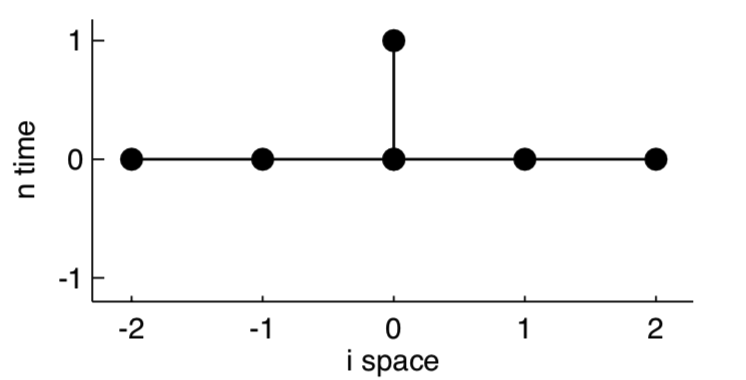

### 1. "Naive" scheme

The "naive" scheme averages the adjacent grid points 

\begin{equation}
f_{i+1/2} = \frac{v}{2}\left(\rho_{i+1} + \rho_i\right)
\end{equation}

Leading to 

\begin{equation}
\rho^{(n+1)}_i  = \rho^{(n)}_i - \frac{C}{2}\left(\rho_{i+1} - \rho_{i-1}\right)
\end{equation}


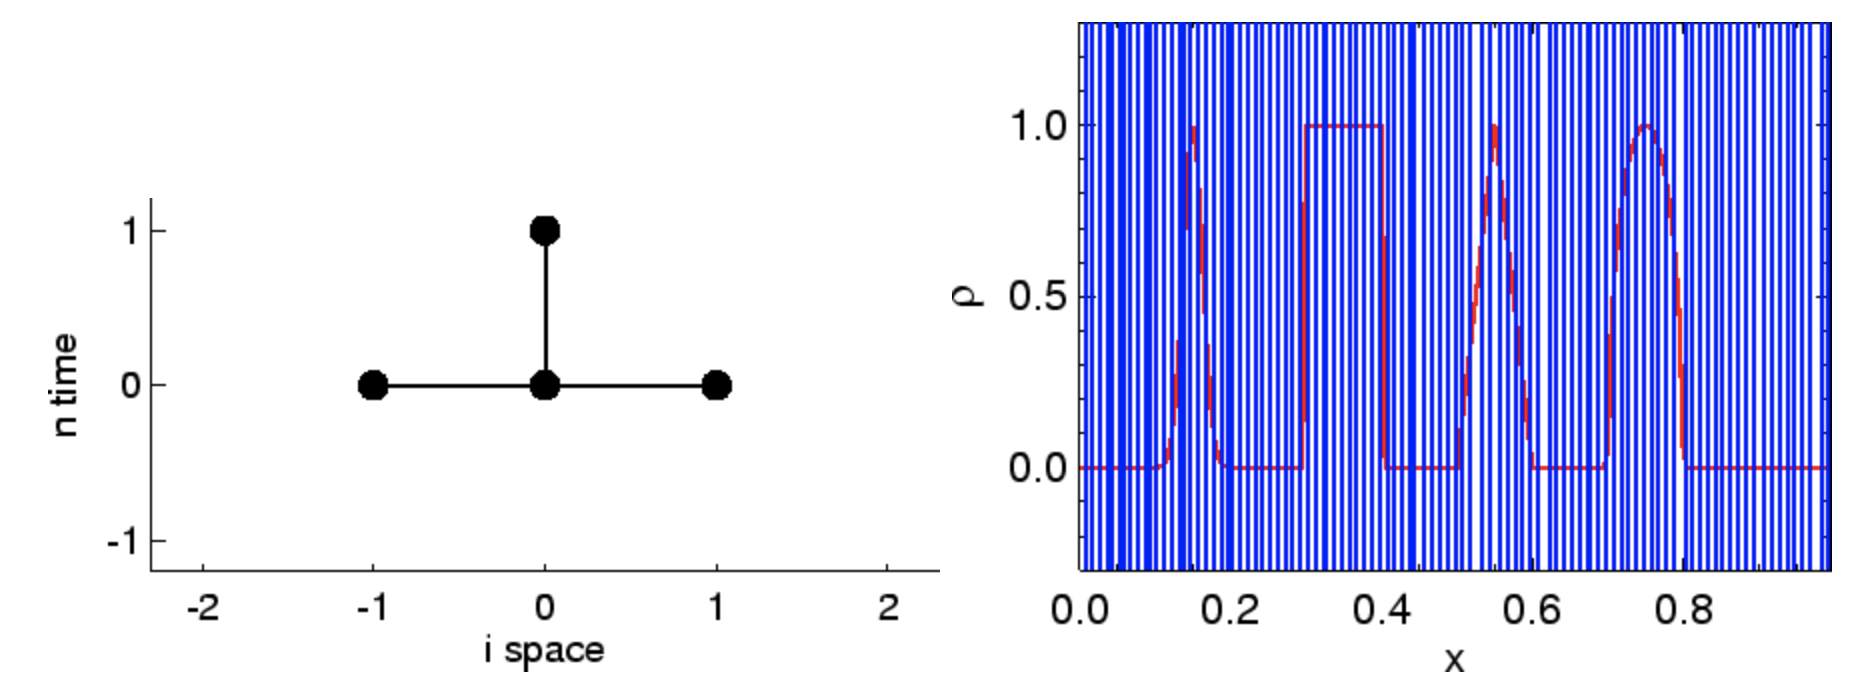

The oscillations are seen to grow exponentially. After some time the numerical result does not have the faintest resemblance to true solution.


### Von-Neumann stability analysis

Why does the naive scheme fail so drastically? Let us look at a Fourier mode of the density 

\begin{equation}
\rho(x,t) = A(t) e^{-ikx}
\end{equation}


The naive scheme turns into

\begin{equation}
A(t+\Delta t)e^{-ikx} = A(t)e^{-ikx} - \frac{C}{2}A(t)\left(e^{-ik(x+\Delta x)} - e^{-ik(x-\Delta x)}\right)
\end{equation}

multiplying by $e^{ikx}$


\begin{equation}
A(t+\Delta t) = A(t) \left[ 1 - \frac{C}{2}\left(e^{-ik\Delta x} -  e^{ik\Delta x}\right)\right]
\end{equation}

the term in parentheses in the RHS is the sine function 

\begin{equation}
A(t+\Delta t) = A(t)\left[1 + i C \sin \left(k\Delta x\right)\right]
\end{equation}

multiplying by the complex conjugate we find the amplitude

\begin{equation}
A^2(t+\Delta t) = A^2(t)\left[1 + C^2 \sin^2\left(k\Delta x\right)\right]
\end{equation}

We see that the amplitude of any wave, irrespective of $k$, will always increase, independently of the Courant number. The scheme is unconditionally unstable. 


### 2. The Donor Cell

The donor cell scheme approximates the flux at half-integers by the flux immediately below


\begin{equation}
f_{i+1/2} = v \rho_{i} 
\end{equation}

also known as <i>upwinding</i>. The scheme results in 

\begin{equation}
\rho^{(n+1)}_i  = (1-C) \rho^{(n)}_i + C\rho^{(n)}_{i-1}
\end{equation}

The stencil is sketched below. It depends on the point and the point immediately upwind. The Courant number is the weight given to the upwind point. 


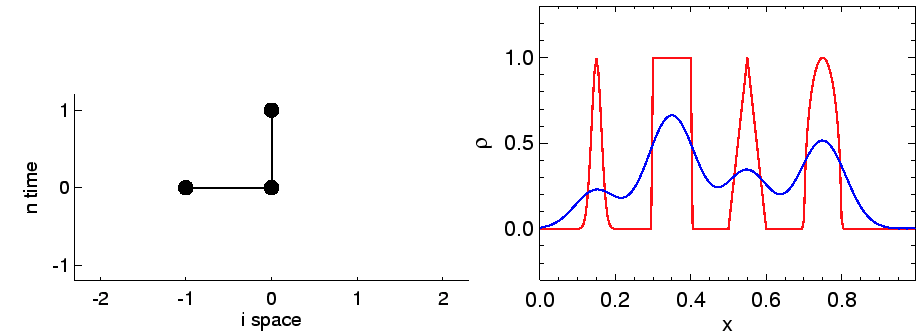


The result is smooth but smeared out severely. Let us look at the von Neumann stability analysis for the donor cell scheme. Using again a single Fourier mode 


\begin{equation}
\rho(x,t) = A(t) e^{-ikx}
\end{equation}

The donor cell scheme turns into

\begin{equation}
A(t+\Delta t)e^{-ikx}  = (1-C) A(t)e^{-ikx} + CA(t)e^{-ik(x-\Delta x)}
\end{equation}

multiplying by $e^{ikx}$

\begin{equation}
A(t+\Delta t)  = A(t) \left(1 - C  +C e^{ik\Delta x}\right)
\end{equation}


expaning the exponential 

\begin{equation}
A(t+\Delta t)  = A(t) \left(1 - C + C\cos k\Delta x + C i\sin k\Delta x\right)
\end{equation}

Replacing $B = 1 - C + C\cos k\Delta x$ and $D = C\sin k\Delta x$

\begin{equation}
A(t+\Delta t)  = A(t) \left(B + iD\right)
\end{equation}

multiplying by the complex conjugate 

\begin{equation}
A^2(t+\Delta t)  = A^2(t) \left(B^2  + D^2\right)
\end{equation}

where the amplification factor is 

\begin{eqnarray}
B^2+D^2 &=& \left(1 - C + C\cos k\Delta x\right)^2 + C^2\sin^2 k\Delta x\\
&=&(1-C)^2 + 2(1-C)C\cos k\Delta x 
\end{eqnarray}


The maximum and minimum values of $\cos k\Delta x$ are 1 and -1, so the amplification is bound between 

\begin{equation}
(1-C)^2 - 2(C-C^2) \leq B^2+D^2 \leq (1-C)^2 + 2(C-C^2) 
\end{equation}

For the maximum amplification to be below 1 we require 

\begin{equation}
0 \leq 1 - C^2 \leq 1 
\end{equation}

which is true for 

\begin{equation}
\boxed{
C \leq 1
}
\end{equation}


This is the <i>condition of stability</i> of the donor cell scheme.

Upwinding seems promising to achieve stability. However, the accuracy of the scheme has to be improved.

### 2.1 Slopes of the donor cell 

The next schemes use the concept of the <i>slope</i> of the donor cell, where the half-integer fluxes are approximated by 

\begin{equation}
f_{i+1/2} = v\left[ \rho_{i} + \frac{1}{2}\delta \rho_i \ \mbox{sign}(v) \ (1-C) \right]
\end{equation}


For positive velocity, this simplifies into 

\begin{equation}
f_{i+1/2} = v\left[ \rho_{i} + \frac{1}{2}\delta \rho_i (1-C) \right]
\end{equation}

So it is just the donor cell value $\rho_{i}$, with a term that depends on the slope of the function over the cell, a quantity still to be defined. The different schemes differ in how they define the slope $\delta \rho_i$


### 2.1.1 Linear Slopes

At each grid cell $i$, one can choose between two "natural" slopes to use. These slopes are determined by the difference between the points $i$ and $i+1$ (forward slope) and that between the points $i-1$ and $i$ (backward slope).  


#### Lax-Wendroff

The Lax-Wendroff scheme uses the forward slope

\begin{equation}
\delta \rho_i = \delta\rho_{\rm forward} = \rho_{i+1} - \rho_i
\end{equation}


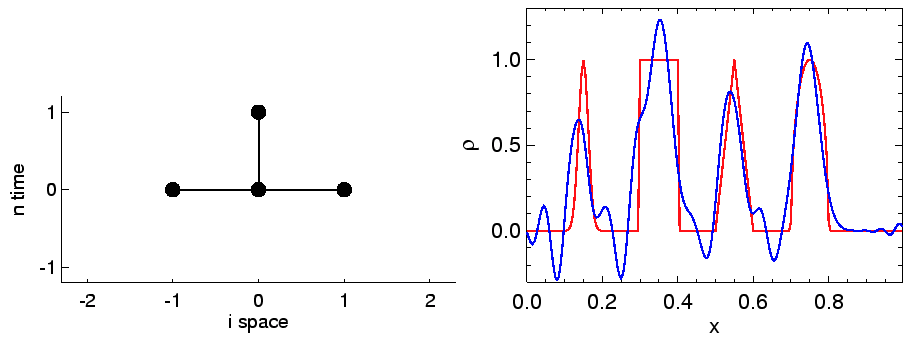

The result is smooth with considerable overshoot (that, however, does not grow in time). This scheme might be useful for more regular initial conditions.


#### Beam-Warming

The Beam-Warming scheme uses the backward slope

\begin{equation}
\delta \rho_i = \delta\rho_{\rm backward} = \rho_{i} - \rho_{i-1}
\end{equation}

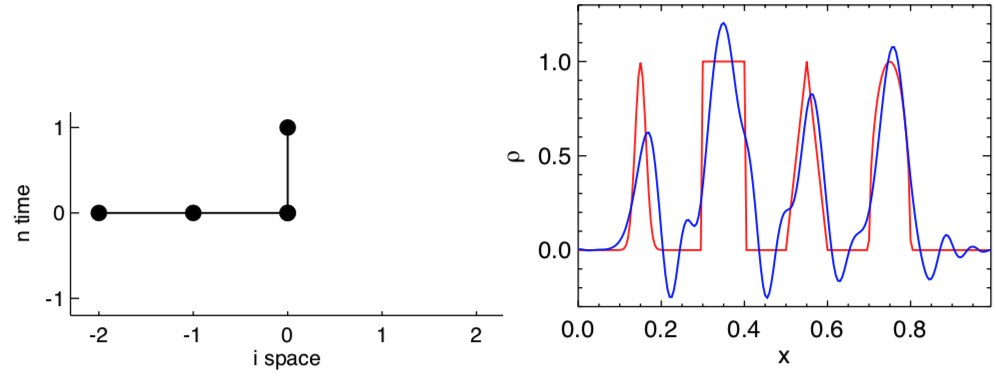

#### Fromm

The Fromm scheme is the average of forward and backward

\begin{equation}
\delta \rho_i = \frac{1}{2}\left(\delta\rho_{\rm forward}+\delta\rho_{\rm backward}\right)
\end{equation}

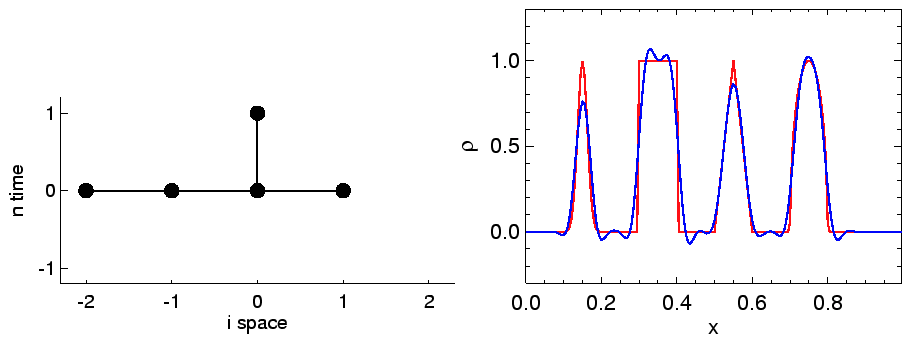

The result is smooth with some amount of overshoot. The initial shape of the spikes is recognizable. So far the best scheme, if the overshoot can be accepted.

### 2.1.2 Nonlinear Slopes

The nonlinear schemes are also called <b>slope limiters</b>. In these schemes, nonlinear corrections are inserted with the purpose of hindering the oscillations from going unstable. The way these schemes achieve this result is by limiting the slope to well-behaved values. We will try three slope limiters: MinMod, Van Leer, and Superbee. 

#### MinMod

In the MinMod slope limiter, the slope is determined by 

\begin{eqnarray}
\delta \rho_i &=& \mathrm{min}[\mathrm{max} (\delta \rho_f,0),\mathrm{max}(\delta \rho_b,0)] \\
&+& \mathrm{max}[\mathrm{min} (\delta \rho_f,0),\mathrm{min}(\delta \rho_b,0)]
\end{eqnarray}

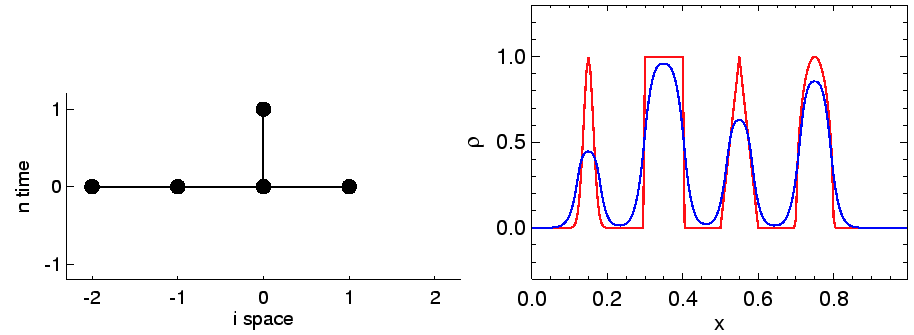

#### Van Leer

\begin{equation}
\delta \rho_i = \left\{
\begin{array}{ccc}
\frac{2}{\delta\rho_f^{-1} + \delta\rho_b^{-1}} & \quad & \mathrm{if} \quad \delta\rho_f \delta\rho_b \gt 0  \\
0 &\quad & \mathrm{if} \quad  \delta\rho_f \delta\rho_b \leq 0
\end{array}\right.
\end{equation}

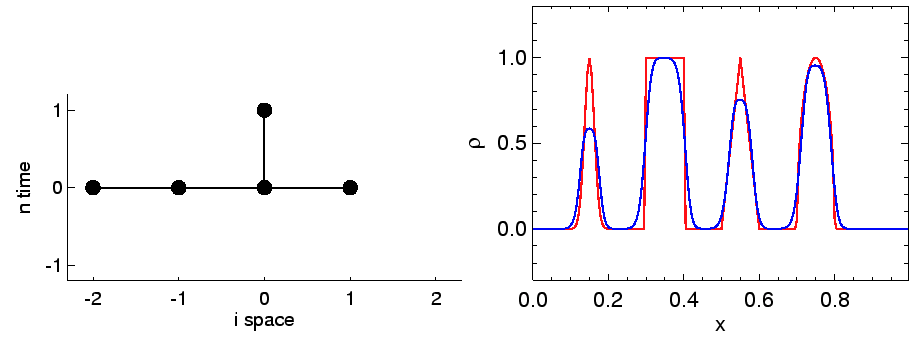

#### Superbee

\begin{equation}
\delta \rho_i = \left[\mbox{sign}(\delta \rho_f) + \mbox{sign}(\delta \rho_b)\right] \times 
\mathrm{min} \left\{ \mbox{abs}(\delta\rho_f), \mbox{abs}(\delta\rho_b), \frac{1}{2} \mbox{max} \left[\mbox{abs}(\delta\rho_f),\mathrm{abs}\left(\delta\rho_b\right) \right]\right\}
\end{equation}

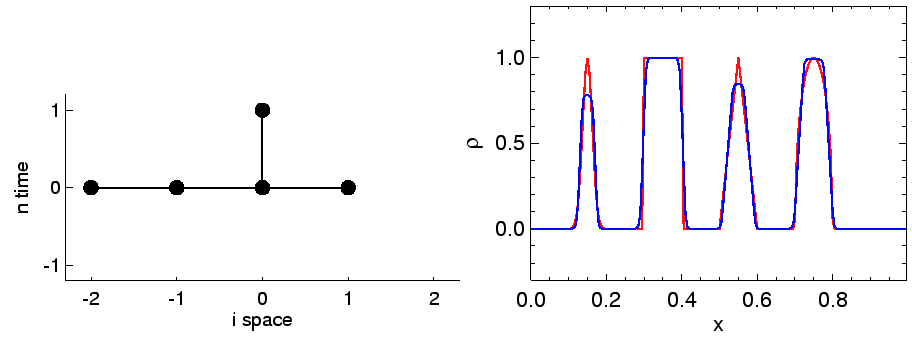

### Exercises 

#### The stable schemes 

* Use a Gaussian ( $e^{-\left(x/0.1\right)^2}$) and a rectangle ( $1 \mbox{ for abs}(x) < 0.2 \mbox{ and } 0 \mbox{ elsewhere}$) as initial conditions. 

* Use a reasonable Courant number (e.g. $C=0.4$) and keep it fixed. Simulate a complete 
revolution ( $v\Delta T    = 1$) to facilitate the comparison with the exact final result (= initial condition).

* Compare the results for different resolutions (e.g. 25, 50, 100, 200 grid points).

* Measure the error with the following norms

The 1-norm

\begin{equation}
N_1 = \frac{1}{N} \sum_i^N \mbox{abs}\left(\rho_i^{(t)} - \rho_i^{(0)}\right)
\end{equation}

The Euclidian 2-norm 

\begin{equation}
N_2 = \frac{1}{N} \left[\sum_i^N \mbox{abs}\left(\rho_i^{(t)} - \rho_i^{(0)}\right)^2\right]^{1/2}
\end{equation}

and the maximum-norm 


\begin{equation}
N_\mathrm{max} = \mbox{max abs} \left(\rho_i^{(t)} - \rho_i^{(0)}\right)
\end{equation}



### High-order finite-difference derivatives

The first derivative, to 2nd order accuracy is 

\begin{equation}
f_i^\prime = \frac{-f_{i-1} + f_{i+1}}{2\Delta x} + \mathcal{O}(\Delta x^2)
\end{equation}

to 4th order accuracy, it is 

\begin{equation}
f_i^\prime = \frac{f_{i-2} -8f_{i-1} +8f_{i+1} - f_{i+2}}{12\Delta x} + \mathcal{O}(\Delta x^4)
\end{equation}

to 6th order accuracy, it is 

\begin{equation}
f_i^\prime = \frac{-f_{i-3} + 9f_{i-2} -45f_{i-1} +45f_{i+1} -9f_{i+2} + f_{i+3}}{60\Delta x} + \mathcal{O}(\Delta x^6)
\end{equation}

The table below shows the coefficients (weights) given to each point on computing a derivative to desired accuracy. We will draw from this table to compute first and second derivatives, mostly. But how are these coefficients determined?  

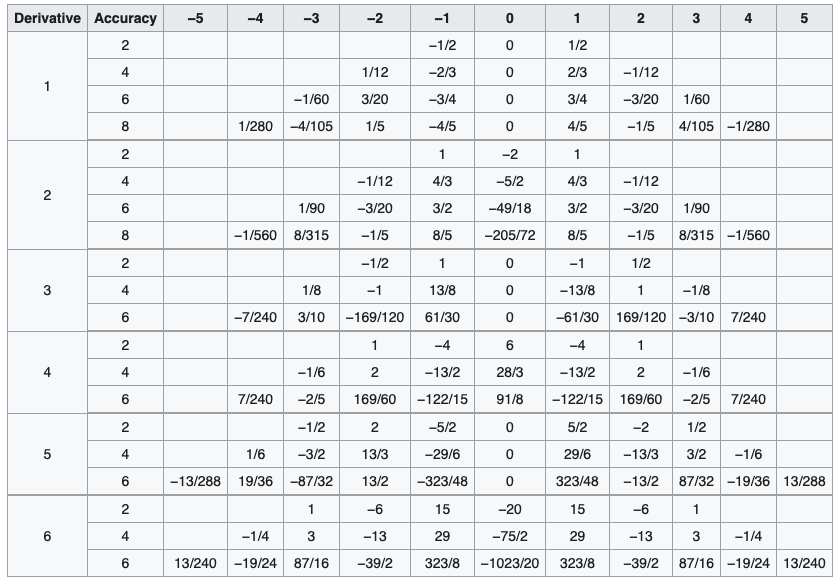

These coefficients come from Taylor expansion. Suppose that we want to compute df/dx to 2nd order. Using a 3-point stencil, we have 

\begin{equation}
\frac{df}{dx} = \frac{1}{h}\left[Af(x-h) + Bf(x) + Cf(x+h)\right]
\end{equation}

where $h=\Delta x$. According to the table above, we expect to find $A=-1/2$, $B=0$ and $C=1/2$. Let us prove this.

If we Taylor expand around $x$, 

\begin{eqnarray}
Af(x-h) &=& Af(x) + Af^\prime(x)(-h) + Af^{\prime\prime}(x)\frac{h^2}{2}  \\
Bf(x)   &=& Bf(x)   \\
Cf(x+h) &=& Cf(x) + Cf^\prime(x)(h) + Cf^{\prime\prime}(x)\frac{h^2}{2} 
\end{eqnarray}

Summing them all 

\begin{equation}
h\frac{df}{dx} = f(x)(A+B+C) + f^\prime(x)(A-C)h + f^{\prime\prime}(x)\frac{h^2}{2}(A+C) 
\end{equation}

Since only the first derivative should survive in the RHS, this leads to the conditions 

\begin{eqnarray}
A+B+C&=&0\\
A-C &=& 1\\
A+C &=& 0 
\end{eqnarray}

Leading to $A=-1/2$, $C=1/2$, $B=0$, as expected. 



Another example, find the fourth derivative $d^4f/dx^4$, with a 5-point stencil 


\begin{equation}
h^4\frac{d^4f}{dx^4} = Af(x-2h) + Bf(x-h) + Cf(x) + Df(x+h) + Ef(x+2h)
\end{equation}

Expanding the terms in Taylor to fourth order 

\begin{eqnarray}
Af(x-2h) &=& Af(x) + Af^\prime(x)(-2h) + Af^{\prime\prime}(x)\frac{(2h)^2}{2}  + Af^{\prime\prime\prime}(x)\frac{(-2h)^3}{6}+ Af^{\prime\prime\prime\prime}(x)\frac{(2h)^4}{24}\\
Bf(x-h) &=& Bf(x) + Bf^\prime(x)(-h) + Bf^{\prime\prime}(x)\frac{h^2}{2}  + Bf^{\prime\prime\prime}(x)\frac{(-h)^3}{6}+ Bf^{\prime\prime\prime\prime}(x)\frac{h^4}{24}\\
Cf(x) &=& Cf(x)\\
Df(x+h) &=& Df(x) + Df^\prime(x)(h) + Df^{\prime\prime}(x)\frac{h^2}{2}  + Df^{\prime\prime\prime}(x)\frac{h^3}{6}+ Df^{\prime\prime\prime\prime}(x)\frac{h^4}{24}\\
Ef(x+2h) &=& Ef(x) + Ef^\prime(x)(2h) + Ef^{\prime\prime}(x)\frac{(2h)^2}{2}  + Ef^{\prime\prime\prime}(x)\frac{(2h)^3}{6}+ Ef^{\prime\prime\prime\prime}(x)\frac{(2h)^4}{24}
\end{eqnarray}

And grouping together the terms with same order in the derivative

\begin{eqnarray}
f(x)[A+B+C+D+E] &=& 0\\
f^\prime(x)h[-2A-B+D+2E] &=& 0\\
f^{\prime\prime}(x)\frac{h^2}{2}[(-2)^2+B +D+2^2E] &=& 0\\
f^{\prime\prime\prime}(x)\frac{h^3}{3!}[(-2)^3A-B +D+2^3E]&=&0\\
f^{\prime\prime\prime\prime}(x)\frac{h^4}{4!}[(-2)^4A+B +D+2^4E]&=&f^{\prime\prime\prime\prime}(x)h^4
\end{eqnarray}

The system  is 

\begin{eqnarray}
A+B+C+D+E &=& 0 \\
-2A-B+D+2E &=& 0 \\
4A+B +D+4E &=& 0 \\
-8A-B +D+8E &=&0 \\
16A+B +D+16E &=&4!
\end{eqnarray}


In matrix form this equation is 

\begin{equation}
\left[
\begin{array}{ccccc}
1&1&1&1&1\\
-2&-1&0&1&2\\
4&1&0&1&4\\
-8&-1&0&1&8\\
16&1&0&1&16
\end{array}\right]
\left[
\begin{array}{c}
A\\
B\\
C\\
D\\
E
\end{array}\right]=4!\left[
\begin{array}{c}
0\\
0\\
0\\
0\\
1
\end{array}\right]
\end{equation}

This yields $(A,B,C,D,E)=(1,-4,6,-4,1)$ as shown below. 


In [8]:
a=np.zeros([5,5]) 

s=[-2,-1,0,1,2]

for i in range(5):
    for j in range(5):
        a[i,j] = s[j]**(i) 

print(a,"\n")
a_inv = np.linalg.inv(a)
rhs=24 * np.transpose([0,0,0,0,1])
coefficients=np.matmul(a_inv,rhs) 


print(coefficients)

[[ 1.  1.  1.  1.  1.]
 [-2. -1.  0.  1.  2.]
 [ 4.  1.  0.  1.  4.]
 [-8. -1.  0.  1.  8.]
 [16.  1.  0.  1. 16.]] 

[ 1. -4.  6. -4.  1.]


In general, this recurrence relationship is 

\begin{equation}
(-2)^n A + (-1)^nB + 0^n C + 1^nD + 2^nE = 4! \ \delta(n-4)
\end{equation}

We can distill from this the general formula. The bases are the set of stencil positions, $s=(-2,-1,0,1,2)$. The coefficients $c$ (in this case, $A$ to $E$) are set by 

\begin{equation}
\boxed{
\sum_{i=0}^{N-1} s_i^n c_i = d! \ \delta(n-d) \quad \mbox{for $0 < n < N-1$} 
}
\end{equation}


where $N$ is the size of the stencil, and $d$ the order of the derivative. 

Let us calculate with this formula the second derivative to 4th order accuracy, with a 5-point stencil.

\begin{equation}
\left[
\begin{array}{ccccc}
1&1&1&1&1\\
-2&-1&0&1&2\\
4&1&0&1&4\\
-8&-1&0&1&8\\
16&1&0&1&16
\end{array}\right]
\left[
\begin{array}{c}
a_1\\
a_2\\
a_3\\
a_4\\
a_5
\end{array}\right]=2\left[
\begin{array}{c}
0\\
0\\
1\\
0\\
0
\end{array}\right]
\end{equation}




In [14]:
rhs=2 * np.transpose([0,0,1,0,0])
coefficients=np.matmul(a_inv,rhs) 

print(coefficients)


[-0.08333333  1.33333333 -2.5         1.33333333 -0.08333333]


In rational numbers, these are -1/12, 4/3, 5/2, 4/3, -1/12, exactly as stated in the table above.

### Courant criterion (aka Courant–Friedrichs–Lewy condition)

The Courant criterion is the condition to select the timestep of a hydrodynamical simulation. We encountered it already when we derived the stability condition of the Donor cell. Given the Courant number, $C$, we found that the condition for stability was  $C \leq 1$. Recalling the definition of the Courant number

\begin{equation}
C \equiv \frac{v\Delta t}{\Delta x}
\end{equation}

The condition $C \leq 1$ means that $v\Delta t \leq \Delta x$. So, qualitatevely, it means that the timestep must be such that no flux crosses more than one grid cell at a time. This is a necessary, but not sufficient, intuitive condition for stability.


2nd order derivatives

\begin{eqnarray}
f^\prime_i &=& \frac{1}{2\Delta x} \left(-f_{i-1}+f_{i+1}\right)\\
f^{\prime\prime}_i &=& \frac{1}{\Delta x^2} \left(f_{i-1}-2f_i+f_{i+1}\right)
\end{eqnarray}

4th order derivatives

\begin{eqnarray}
f^\prime_i &=& \frac{1}{12\Delta x} \left(f_{i-2}-8f_{i-1}+8f_{i+1}-f_{i+2}\right)\\
f^{\prime\prime}_i &=& \frac{1}{12\Delta x^2} \left(-f_{i-2}+16f_{i-1}-30f_i+16f_{i+1}-f_{i+2}\right)
\end{eqnarray}


6th order derivatives

\begin{eqnarray}
f^\prime_i &=& \frac{1}{60\Delta x} \left(-f_{i-3}+9f_{i-2}-45f_{i-1}+45f_{i+1}-9f_{i+2}+f_{i+3}\right)\\
f^{\prime\prime}_i &=& \frac{1}{180\Delta x^2} \left(2f_{i-3}-27f_{i-2}+270f_{i-1}-490f_i+270f_{i+1}-27f_{i+2}+2f_{i+3}\right)
\end{eqnarray}
